In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler

In [2]:
df = pd.read_csv('datasets/train.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6.0,6
1,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8.0,10
2,GP,F,NaN,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,NaN,15
3,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10.0,10
4,GP,F,NaN,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5.0,6


In [3]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5.0,6
1,GP,M,NaN,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15.0,15
2,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12.0,11
3,GP,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15.0,15
4,GP,F,NaN,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12.0,12


In [4]:
numpy_array = df[['G1']].values
numpy_array1 = test_df[['G1']].values

g1_binarizer = Binarizer(10)
g1_binarizer.fit(numpy_array)

Binarizer(copy=True, threshold=10)

In [5]:
g1_grades = g1_binarizer.transform(numpy_array)

In [8]:
print(g1_grades[0:5], numpy_array[0:5], g1_grades.mean())

[[0]
 [0]
 [1]
 [0]
 [0]] [[ 5]
 [ 7]
 [15]
 [ 6]
 [ 6]] 0.473684210526


In [9]:
g1_grades_test = g1_binarizer.transform(numpy_array1)
print(g1_grades_test[0:5], numpy_array1[0:5], g1_grades_test.mean())

[[0]
 [1]
 [1]
 [1]
 [0]] [[ 5]
 [15]
 [12]
 [14]
 [10]] 0.546341463415


In [16]:
df[['absences']].describe()

,absences
count,190.000000
mean,6.894737
std,9.471175
min,0.000000
25%,2.000000
50%,4.000000
75%,10.000000
max,75.000000


In [13]:
import scipy.stats as stats

In [17]:
stats.mode(df['absences'])

ModeResult(mode=array([0], dtype=int64), count=array([46]))

In [23]:
numpy_array_ab = df[['absences']].values
ab_binarizer = Binarizer(4)
ab_binarizer.fit(numpy_array_ab)

Binarizer(copy=True, threshold=4)

In [22]:
absences = ab_binarizer.transform(numpy_array_ab)
print(absences[0:5], numpy_array_ab[0:5], absences.mean())

[[0]
 [0]
 [0]
 [0]
 [0]] [[ 6]
 [10]
 [ 2]
 [ 4]
 [ 6]] 0.221052631579


In [26]:
numpy_array_abtest = test_df[['absences']].values
absences_test = ab_binarizer.transform(numpy_array_abtest)
print(absences_test[0:5], absences_test.mean())

[[0]
 [1]
 [0]
 [0]
 [0]] 0.336585365854


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 33 columns):
school        190 non-null object
sex           190 non-null object
age           147 non-null float64
address       190 non-null object
famsize       190 non-null object
Pstatus       190 non-null object
Medu          190 non-null int64
Fedu          190 non-null int64
Mjob          190 non-null object
Fjob          190 non-null object
reason        190 non-null object
guardian      190 non-null object
traveltime    190 non-null int64
studytime     190 non-null int64
failures      190 non-null int64
schoolsup     190 non-null object
famsup        190 non-null object
paid          190 non-null object
activities    190 non-null object
nursery       190 non-null object
higher        190 non-null object
internet      190 non-null object
romantic      190 non-null object
famrel        190 non-null int64
freetime      190 non-null int64
goout         190 non-null int64
Dalc          190 

In [29]:
df.isnull().sum()[df.isnull().sum() > 0]

age    43
G2     56
dtype: int64

In [30]:
from scipy.stats import mode

mode(df['age'])

ModeResult(mode=array([ 16.]), count=array([40]))

In [31]:
df.age.describe()

count    147.000000
mean      16.659864
std        1.268677
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       19.000000
Name: age, dtype: float64

In [37]:
age_array = df[['age']].values
age_imputer = Imputer(strategy='median')
age_imputer.fit(age_array)

ages = age_imputer.transform(age_array)
print(df['age'].mean(), ages[0:5], ages.mean())

16.65986394557823 [[ 18.]
 [ 15.]
 [ 17.]
 [ 16.]
 [ 17.]] 16.7368421053


In [36]:
test_age = test_df[['age']].values
age_imputer.fit(test_age)

test_agepost = age_imputer.transform(test_age)
print(test_df['age'].mean(), test_agepost[0:5], test_agepost.mean())

16.683870967741935 [[ 17.]
 [ 17.]
 [ 16.]
 [ 15.]
 [ 17.]] 16.7609756098


In [40]:
df[['G2']].describe()

,G2
count,134.000000
mean,10.335821
std,3.840708
min,0.000000
25%,8.000000
50%,10.000000
75%,12.750000
max,19.000000


In [41]:
g2 = df[['G2']].values
g2_imputer = Imputer(strategy='median')
g2_imputer.fit(g2)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [44]:
g2i = g2_imputer.transform(g2)
print(g2i[0:5], g2i.mean())


[[  6.]
 [  8.]
 [ 10.]
 [ 10.]
 [  5.]] 10.2368421053


In [45]:
g2_imputer.statistics_

array([ 10.])

In [47]:
print('pre-mean values: ', test_df['G2'].mean())
test_g2_pre = test_df[['G2']].values
test_g2_post = g2_imputer.transform(test_g2_pre)

print(test_g2_post[0:5], test_g2_post.mean())

pre-mean values:  11.177215189873417
[[  5.]
 [ 15.]
 [ 12.]
 [ 15.]
 [ 12.]] 10.9073170732


In [49]:
from sklearn.preprocessing import PolynomialFeatures
G3 = df[['G3']].values
pf = PolynomialFeatures(3, include_bias=False)
pf.fit(G3)
age_age_squared = pf.transform(G3)

print(age_age_squared[0:5])

[[    6.    36.   216.]
 [   10.   100.  1000.]
 [   15.   225.  3375.]
 [   10.   100.  1000.]
 [    6.    36.   216.]]


In [50]:
mm_scaler = MinMaxScaler()

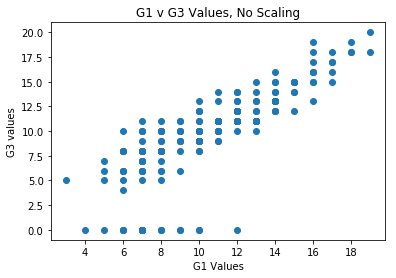

In [52]:
g1_g3 = df[['G1', 'G3']].values

plt.scatter(g1_g3[:,0], g1_g3[:, 1])
plt.xlabel('G1 Values')
plt.ylabel('G3 values')
plt.title('G1 v G3 Values, No Scaling')

In [54]:
mm_scaler.fit(g1_g3)

ss_scaler = StandardScaler()
ss_scaler.fit(g1_g3)

rb_scaler = RobustScaler()
rb_scaler.fit(g1_g3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [59]:
mm_g1g3 = mm_scaler.transform(g1_g3)

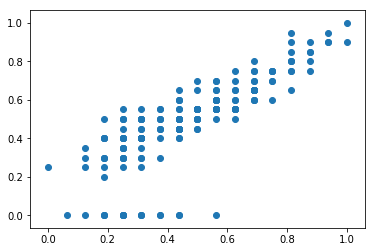

In [60]:
plt.scatter(mm_g1g3[:, 0], mm_g1g3[:, 1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


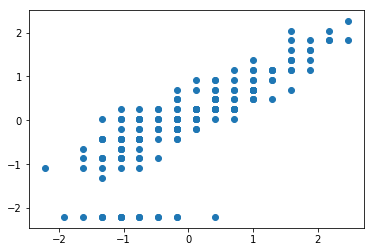

In [61]:
ss_g1g3 = ss_scaler.transform(g1_g3)
plt.scatter(ss_g1g3[:, 0], ss_g1g3[:, 1])

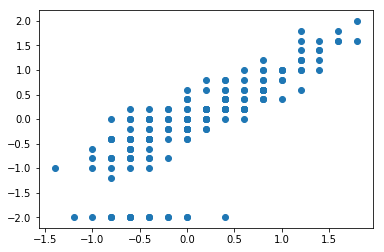

In [62]:
rb_g1g3 = rb_scaler.transform(g1_g3)
plt.scatter(rb_g1g3[:, 0], rb_g1g3[:, 1])

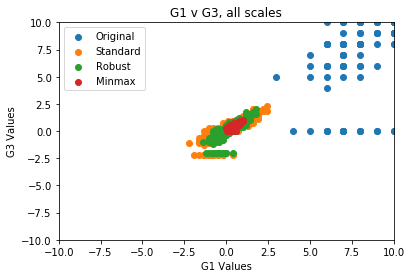

In [69]:
plt.scatter(g1_g3[:, 0], g1_g3[:, 1], 
            label='Original')
plt.scatter(ss_g1g3[:, 0], ss_g1g3[:, 1],
           label='Standard')
plt.scatter(rb_g1g3[:, 0], rb_g1g3[:, 1],
           label='Robust')
plt.scatter(mm_g1g3[:, 0], mm_g1g3[:, 1], 
            label='Minmax')
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.legend()
plt.title('G1 v G3, all scales')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


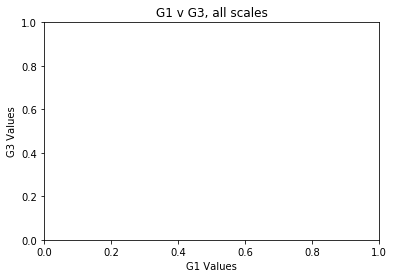

In [64]:
plt.xlabel('G1 Values')
plt.ylabel('G3 Values')
plt.legend()
plt.title('G1 v G3, all scales')

In [71]:
print(mm_scaler.data_range_, mm_scaler.data_min_, mm_scaler.data_max_)
print(ss_scaler.mean_, ss_scaler.var_)
print(rb_scaler.center_, rb_scaler.scale_)

[ 16.  20.] [ 3.  0.] [ 19.  20.]
[ 10.57894737   9.87368421] [ 11.62271468  19.93141274]
[ 10.  10.] [ 5.  5.]
